In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import rasterio

In [3]:
df = pd.read_csv('D:/Jintu/Jintu_GEDI/AGBD/Study Area/Shapefile/Multi_Points/Dbase_AGBD.csv', sep=',', index_col=0)

In [4]:
df

,Longitude,Latitude,Pixel_Valu,TIRS,SWIR,RED,NIR,NDWI,NDVI,EVI,DISS,CORR,CONT,BLUE,ELEVATION,SLOPE,ASPECT
Points,,,,,,,,,,,,,,,,,
1,92.560829,26.949767,12,292.838,0.165389,0.064778,0.260238,0.222845,0.601385,0.573957,168.645833,-0.026570,36265.937500,0.106338,142,0.92741,0.0000
2,92.589440,26.959305,12,291.226,0.205517,0.096997,0.236679,0.070470,0.418617,0.369360,234.750000,-0.226263,93283.958333,0.116430,142,5.50662,289.6230
3,92.694348,26.930693,13,292.655,0.160582,0.058403,0.280660,0.272137,0.655505,0.653576,419.312500,-0.440778,236985.354167,0.104122,112,3.47010,143.2120
4,92.579903,26.949767,14,292.734,0.207938,0.089223,0.162218,-0.123515,0.290305,0.216671,274.666667,-0.267260,104196.041667,0.114044,131,2.12589,150.7110
5,92.589440,26.949767,15,293.082,0.277591,0.124783,0.268522,-0.016606,0.365465,0.334769,147.187500,-0.132098,31441.270833,0.125840,137,1.39359,228.2860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,92.103050,26.692267,38,291.483,0.149192,0.074779,0.219026,0.189652,0.490963,0.453778,331.145833,0.072619,143558.229167,0.116400,94,2.12474,330.7670
1616,92.474996,26.663656,39,292.223,0.132962,0.062996,0.212022,0.229171,0.541878,0.499502,295.625000,0.186375,152132.041667,0.112550,77,0.92741,0.0000
1617,92.207958,26.682730,42,292.871,0.251918,0.128680,0.227954,-0.049938,0.278362,0.257389,234.541667,-0.024215,115764.375000,0.138107,90,2.78188,48.2190


In [6]:
y = df.pop('Pixel_Valu')
X = df
y

Points
1       12
2       12
3       13
4       14
5       15
        ..
1615    38
1616    39
1617    42
1618    44
1619    53
Name: Pixel_Valu, Length: 1619, dtype: int64

In [7]:
df

,Longitude,Latitude,TIRS,SWIR,RED,NIR,NDWI,NDVI,EVI,DISS,CORR,CONT,BLUE,ELEVATION,SLOPE,ASPECT
Points,,,,,,,,,,,,,,,,
1,92.560829,26.949767,292.838,0.165389,0.064778,0.260238,0.222845,0.601385,0.573957,168.645833,-0.026570,36265.937500,0.106338,142,0.92741,0.0000
2,92.589440,26.959305,291.226,0.205517,0.096997,0.236679,0.070470,0.418617,0.369360,234.750000,-0.226263,93283.958333,0.116430,142,5.50662,289.6230
3,92.694348,26.930693,292.655,0.160582,0.058403,0.280660,0.272137,0.655505,0.653576,419.312500,-0.440778,236985.354167,0.104122,112,3.47010,143.2120
4,92.579903,26.949767,292.734,0.207938,0.089223,0.162218,-0.123515,0.290305,0.216671,274.666667,-0.267260,104196.041667,0.114044,131,2.12589,150.7110
5,92.589440,26.949767,293.082,0.277591,0.124783,0.268522,-0.016606,0.365465,0.334769,147.187500,-0.132098,31441.270833,0.125840,137,1.39359,228.2860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,92.103050,26.692267,291.483,0.149192,0.074779,0.219026,0.189652,0.490963,0.453778,331.145833,0.072619,143558.229167,0.116400,94,2.12474,330.7670
1616,92.474996,26.663656,292.223,0.132962,0.062996,0.212022,0.229171,0.541878,0.499502,295.625000,0.186375,152132.041667,0.112550,77,0.92741,0.0000
1617,92.207958,26.682730,292.871,0.251918,0.128680,0.227954,-0.049938,0.278362,0.257389,234.541667,-0.024215,115764.375000,0.138107,90,2.78188,48.2190


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#set classifier parameters and train classifier
# Assuming X_train contains the 'NDVI' and 'NDWI' columns and y_train contains the target labels
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train[['TIRS', 'SWIR','RED','NIR','NDWI','NDVI','EVI','DISS','CORR','CONT','BLUE','ELEVATION','SLOPE','ASPECT']], y_train)

RandomForestClassifier()

In [ ]:
#accuracy_score(y_test, predicted)

In [14]:
path_ndwi="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/TIRS/Landsat_Landsat_2022_01_TIRS.tif.tif"
path_ndvi="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/SWIR/Landsat_Landsat_2022_01_SWIR.tif.tif"
path_evi="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/RED/Landsat_Landsat_2022_01_RED.tif.tif"
path_nir="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NIR/Landsat_Landsat_2022_01_NIR.tif.tif"
path_red="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NDWI/NDWI_Landsat_2022_01_NDWI.tif.tif"
path_blue="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NDVI/NDVI_Landsat_2022_01_NDVI.tif.tif"
path_swir="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/EVI/EVI_Landsat_2022_01_EVI.tif.tif"
path_corr="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/DISSIMILARITY/GLCM_dissimilarity_2022.tif.tif"
path_diss="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/CORRELATION/GLCM_correlation_2022.tif.tif"
path_cont="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/CONTRAST/GLCM_contrast_2022.tif.tif"
path_asp="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/BLUE/Landsat_Landsat_2022_01_BLUE.tif.tif"
path_elv="D:/Jintu/Jintu_LULC/TestDL_3/DL_Prediction/ELEVATION/Elevation.tif"
path_slp="D:/Jintu/Jintu_LULC/TestDL_3/DL_Prediction/SLOPE/Slope.tif"
path_ti="D:/Jintu/Jintu_LULC/TestDL_3/DL_Prediction/ASPECT/Aspect.tif"
#path_bsi="D:/Jintu/Jintu_ShareFolder/TestDL_3/Landsat Images/Bands/fcd_output/bsi.tif"
# path_csi="D:/Jintu/Jintu_ShareFolder/TestDL_3/Landsat Images/Bands/fcd_output/csi.tif"
# path_fcd="D:/Jintu/Jintu_ShareFolder/TestDL_3/Landsat Images/Bands/fcd_output/fcd.tif"
# path_avi="D:/Jintu/Jintu_ShareFolder/TestDL_3/Landsat Images/Bands/fcd_output/avi.tif"

In [15]:
# Read NDWI data
with rasterio.open(path_ndwi) as ndwi_ds:
    ndwi_data = ndwi_ds.read(1)  # Assuming you want the first band

# Read NDVI data
with rasterio.open(path_ndvi) as ndvi_ds:
    ndvi_data = ndvi_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_evi) as evi_ds:
    evi_data = evi_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_nir) as nir_ds:
    nir_data = nir_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_red) as red_ds:
    red_data = red_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_blue) as blue_ds:
    blue_data = blue_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_swir) as swir_ds:
    swir_data = swir_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_corr) as corr_ds:
    corr_data = corr_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_diss) as diss_ds:
    diss_data = diss_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_cont) as cont_ds:
    cont_data = cont_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_slp) as slp_ds:
    slp_data = slp_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_elv) as elv_ds:
    elv_data = elv_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_asp) as asp_ds:
    asp_data = asp_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_ti) as ti_ds:
    ti_data = ti_ds.read(1)  # Assuming you want the first band
    
# # Read NDVI data
# with rasterio.open(path_bsi) as bsi_ds:
#     bsi_data = bsi_ds.read(1)  # Assuming you want the first band
    
# # Read NDVI data
# with rasterio.open(path_csi) as csi_ds:
#     csi_data = csi_ds.read(1)  # Assuming you want the first band
    
# # Read NDVI data
# with rasterio.open(path_fcd) as fcd_ds:
#     fcd_data = fcd_ds.read(1)  # Assuming you want the first band
    
# # Read NDVI data
# with rasterio.open(path_avi) as avi_ds:
#     avi_data = avi_ds.read(1)  # Assuming you want the first band


In [11]:
# Read NDVI data
with rasterio.open(path_blue) as blue_ds:
    blue_data = blue_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_swir) as swir_ds:
    swir_data = swir_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_corr) as corr_ds:
    corr_data = corr_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_diss) as diss_ds:
    diss_data = diss_ds.read(1)  # Assuming you want the first band
    

In [19]:
ndwi_data_flat = ndwi_data.ravel()
ndvi_data_flat = ndvi_data.ravel()
evi_data_flat = evi_data.ravel()
nir_data_flat = nir_data.ravel()
red_data_flat = red_data.ravel()
blue_data_flat = blue_data.ravel()
swir_data_flat = swir_data.ravel()
corr_data_flat = corr_data.ravel()
diss_data_flat = diss_data.ravel()
cont_data_flat = cont_data.ravel()
slp_data_flat = slp_data.ravel()
elv_data_flat = elv_data.ravel()
asp_data_flat = asp_data.ravel()
ti_data_flat = ti_data.ravel()

In [21]:
print(ndwi_data_flat)

[277.59445 277.5293  277.54233 ... 292.07602 292.0251  291.9741 ]


In [23]:
df = pd.DataFrame({
    'TIRS':ndwi_data_flat,
    'SWIR':ndvi_data_flat,
    'RED':evi_data_flat,
    'NIR':nir_data_flat,
    'NDWI':red_data_flat,
    'NDVI':blue_data_flat,
    'EVI':swir_data_flat,
    'DISS':corr_data_flat,
    'CORR':diss_data_flat,
    'CONT':cont_data_flat,
    'BLUE':slp_data_flat,
    'ELEVATION':elv_data_flat,
    'SLOPE':asp_data_flat,
    'ASPECT':ti_data_flat
})


In [24]:
df

,TIRS,SWIR,RED,NIR,NDWI,NDVI,EVI,DISS,CORR,CONT,BLUE,ELEVATION,SLOPE,ASPECT
0,277.594452,0.064062,0.039685,0.126931,0.329168,0.523634,0.286782,NaN,NaN,NaN,35.506058,2422,0.080598,276.514038
1,277.529297,0.061642,0.035594,0.109509,0.279681,0.509399,0.251866,NaN,NaN,NaN,40.632130,2442,0.078586,275.412506
2,277.542328,0.039583,0.030650,0.083496,0.356787,0.462963,0.186286,NaN,NaN,NaN,39.328053,2469,0.074427,282.552643
3,278.088196,0.061744,0.035048,0.124340,0.336387,0.560214,0.293697,NaN,NaN,NaN,29.630711,2486,0.076609,286.535004
4,278.389038,0.069006,0.035662,0.106441,0.213370,0.498081,0.239791,NaN,NaN,NaN,29.439146,2499,0.077666,273.288605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805796,292.025085,0.114807,0.083176,0.213881,0.301424,0.440000,0.410826,NaN,NaN,NaN,3.109526,69,0.122341,270.000000
3805797,292.115662,0.105148,0.082014,0.223008,0.359158,0.462242,0.437327,NaN,NaN,NaN,2.271713,71,0.121212,294.083282
3805798,292.076019,0.102194,0.081516,0.231804,0.388055,0.479661,0.463670,NaN,NaN,NaN,1.391381,71,0.121412,131.794922
3805799,292.025085,0.100535,0.079757,0.235322,0.401324,0.493732,0.479549,NaN,NaN,NaN,2.271708,70,0.120383,114.083351


In [32]:
print(ndwi_data.shape)

(1321, 2881)


In [26]:
print(df)

               TIRS      SWIR       RED       NIR      NDWI      NDVI  \
0        277.594452  0.064062  0.039685  0.126931  0.329168  0.523634   
1        277.529297  0.061642  0.035594  0.109509  0.279681  0.509399   
2        277.542328  0.039583  0.030650  0.083496  0.356787  0.462963   
3        278.088196  0.061744  0.035048  0.124340  0.336387  0.560214   
4        278.389038  0.069006  0.035662  0.106441  0.213370  0.498081   
...             ...       ...       ...       ...       ...       ...   
3805796  292.025085  0.114807  0.083176  0.213881  0.301424  0.440000   
3805797  292.115662  0.105148  0.082014  0.223008  0.359158  0.462242   
3805798  292.076019  0.102194  0.081516  0.231804  0.388055  0.479661   
3805799  292.025085  0.100535  0.079757  0.235322  0.401324  0.493732   
3805800  291.974091  0.101364  0.079359  0.250756  0.424262  0.519204   

              EVI  DISS  CORR  CONT       BLUE  ELEVATION     SLOPE  \
0        0.286782   NaN   NaN   NaN  35.506058      

In [ ]:
#to check where is the nan value

In [27]:
import pandas as pd

import pandas as pd
import numpy as np

# Replace the values you want to ignore with NaN
# For example, if you want to replace 0 and -3.402823e+38 with NaN
df.replace({0: np.nan, -3.402823e+38: np.nan}, inplace=True)

# Continue with the code to identify and work with NaN values
nan_values = df.isna()
nan_counts = df.isna().sum()
rows_with_nan = df[df.isna().any(axis=1)]
columns_with_nan = df.columns[df.isna().any()]
nan_locations = df[df.isna().any(axis=1)][columns_with_nan]

# Print or inspect the results
print("NaN values in the DataFrame:")
print(nan_values)
print("\nCounts of NaN values in each column:")
print(nan_counts)
print("\nRows with NaN values:")
print(rows_with_nan)
print("\nColumns with NaN values:")
print(columns_with_nan)
print("\nLocations of NaN values:")
print(nan_locations)


NaN values in the DataFrame:
          TIRS   SWIR    RED    NIR   NDWI   NDVI    EVI  DISS  CORR  CONT  \
0        False  False  False  False  False  False  False  True  True  True   
1        False  False  False  False  False  False  False  True  True  True   
2        False  False  False  False  False  False  False  True  True  True   
3        False  False  False  False  False  False  False  True  True  True   
4        False  False  False  False  False  False  False  True  True  True   
...        ...    ...    ...    ...    ...    ...    ...   ...   ...   ...   
3805796  False  False  False  False  False  False  False  True  True  True   
3805797  False  False  False  False  False  False  False  True  True  True   
3805798  False  False  False  False  False  False  False  True  True  True   
3805799  False  False  False  False  False  False  False  True  True  True   
3805800  False  False  False  False  False  False  False  True  True  True   

          BLUE  ELEVATION  SLOPE  

In [ ]:
#if there any nan value

In [28]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with the desired strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your DataFrame
df[['TIRS', 'SWIR','RED','NIR','NDWI','NDVI','EVI','DISS','CORR','CONT','BLUE','ELEVATION','SLOPE','ASPECT']] = imputer.fit_transform(df[['TIRS', 'SWIR','RED','NIR','NDWI','NDVI','EVI','DISS','CORR','CONT','BLUE','ELEVATION','SLOPE','ASPECT']])

In [30]:
op_img = clf.predict(df[['TIRS', 'SWIR','RED','NIR','NDWI','NDVI','EVI','DISS','CORR','CONT','BLUE','ELEVATION','SLOPE','ASPECT']])

MemoryError: Unable to allocate 7.54 GiB for an array with shape (3805801, 266) and data type float64

In [31]:
import numpy as np

# Split the DataFrame into chunks
chunk_size = 10000
num_chunks = len(df) // chunk_size + 1

# Initialize an empty array to store predictions
all_predictions = np.empty((len(df),), dtype=int)

# Predict in chunks
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(df))
    
    # Get the chunk of data
    chunk = df.iloc[start_idx:end_idx]
    
    # Perform prediction on the chunk
    chunk_predictions = clf.predict(chunk[['TIRS', 'SWIR', 'RED', 'NIR', 'NDWI', 'NDVI', 'EVI', 'DISS', 'CORR', 'CONT', 'BLUE', 'ELEVATION', 'SLOPE', 'ASPECT']])
    
    # Store the predictions in the array
    all_predictions[start_idx:end_idx] = chunk_predictions

In [33]:
import numpy as np

# Assuming all_predictions is your array of predictions
reshaped_predictions = all_predictions.reshape((1321, 2881))

In [34]:
print(reshaped_predictions.shape)

(1321, 2881)


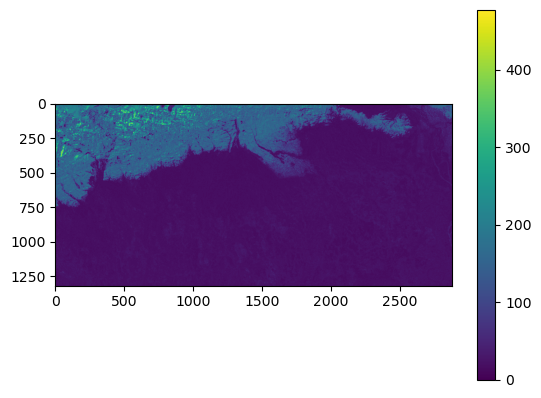

In [35]:
plt.imshow(reshaped_predictions)
plt.colorbar()

C:\Users\mrg22-020914479\AppData\Local\Temp\ipykernel_10728\4272619471.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 6)  # You can use a different colormap if you prefer


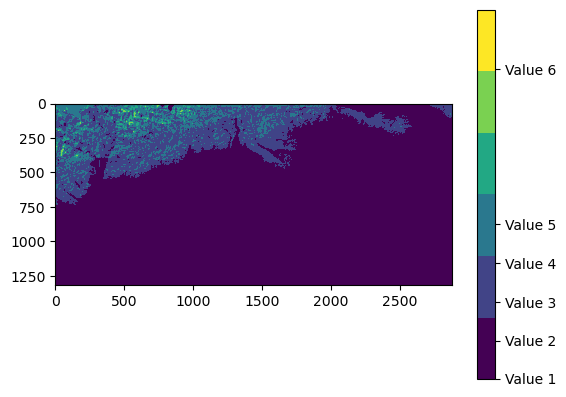

In [37]:
import matplotlib.pyplot as plt

# Create a colormap that maps values 1-5 to specific colors
cmap = plt.cm.get_cmap('viridis', 6)  # You can use a different colormap if you prefer

# Display the image with the custom colormap
plt.imshow(reshaped_predictions, cmap=cmap)

# Add a color bar to show the mapping of values to colors
colorbar = plt.colorbar()
colorbar.set_ticks([1, 50, 100, 150, 200,400])  # Set the tick locations to match your values
colorbar.set_ticklabels(['Value 1', 'Value 2', 'Value 3', 'Value 4', 'Value 5','Value 6'])  # Set tick labels

# Show the plot
plt.show()

In [39]:
import rasterio
from rasterio import Affine

# Define the output GeoTIFF file path
output_path = "D:/Jintu/Jintu_GEDI/AGBD/Study Area/Predicted_rf/rf_agbd.tif"  # Replace with your desired file path

# Define the profile for the output GeoTIFF
# You can use the profile from one of the input files as a template
with rasterio.open(path_ndwi) as mask_ds:
    profile = mask_ds.profile

# Update the profile as needed for your output
# For example, you can update the data type, count, and nodata value
profile.update(
    dtype=rasterio.uint8,  # Change the data type if needed
    count=1,  # Set the number of bands
    nodata=None  # Set the nodata value if needed
)

# Write the output GeoTIFF
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(reshaped_predictions.astype(rasterio.uint8), 1)  # Write the op_img array to the GeoTIFF

print(f"Saved output to {output_path}")


Saved output to D:/Jintu/Jintu_GEDI/AGBD/Study Area/Predicted_rf/rf_agbd.tif
